In [1]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from glob import glob

folder="c:\\pytest_img\\cats_dogs\\"
# files=[f for i in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
files=glob(folder+"*.jpg")
print(f"Working with {len(files)} images")


Working with 25000 images


c:\pytest_img\cats_dogs\cat.0.jpg


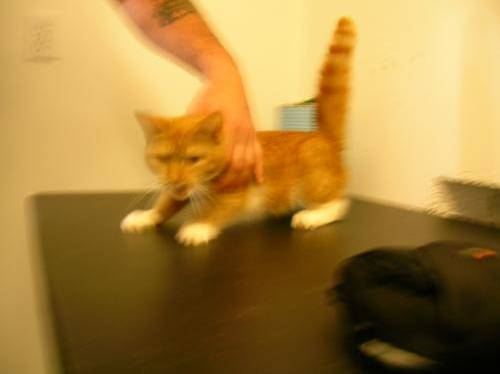

c:\pytest_img\cats_dogs\cat.1.jpg


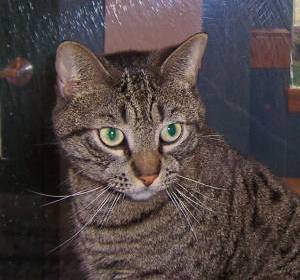

In [2]:
for i in range(2):
    print(files[i])
    display(_Imgdis(filename=files[i],width=120,height=160))

In [3]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
file_names=[]
file_labels=[]
for _file in files:
    file_names.append(_file)
    label=_file.split('\\')[-1].split('.')[0]
    if label=='cat':
        file_labels.append(0)
    elif label=='dog':
        file_labels.append(1)
    else:
        print('Error!')
print(f"files in folder: {len(file_names)}")

files in folder: 25000


#### Data 종류 및 개수 파악

In [8]:
np.unique(np.array(file_labels))

array([0, 1])

In [11]:
import collections
collections.Counter(np.array(file_labels))

Counter({0: 12500, 1: 12500})

In [12]:
file_labels.count(1), file_labels.count(0)

(12500, 12500)

In [13]:
np.bincount(np.array(file_labels))

array([12500, 12500], dtype=int64)

In [15]:
np.unique(np.array(file_labels), return_counts=True)

(array([0, 1]), array([12500, 12500], dtype=int64))

#### .

In [17]:
img = load_img(file_names[0])
print(type(img))
img_array=img_to_array(img)
print("numpy array info:",type(img_array))
print('type:',img_array.dtype)
print('shape:',img_array.shape)

img = load_img(file_names[1])
print(type(img))
img_array=img_to_array(img)
print("numpy array info:",type(img_array))
print('type:',img_array.dtype)
print('shape:',img_array.shape)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
numpy array info: <class 'numpy.ndarray'>
type: float32
shape: (374, 500, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
numpy array info: <class 'numpy.ndarray'>
type: float32
shape: (280, 300, 3)


In [18]:
image_height=20 # 112
image_width=20
channels=3
dataset=np.ndarray(shape=(len(file_labels),image_height,image_width,channels),dtype=np.int32)
print(dataset.shape)

(25000, 20, 20, 3)


In [19]:
import os
if not os.path.exists(os.path.join(folder,'new\\')):
    print('make directory, "new"')
    os.makedirs(os.path.join(folder,'new\\'))

make directory, "new"


In [24]:
from PIL import Image
from tqdm import tqdm
for item in tqdm(file_names):
    img=load_img(item)
    img=img.resize((image_width,image_height),Image.Resampling.LANCZOS)
    img.save(fp=os.path.join(folder,'new\\')+item.split('\\')[-1])

100%|██████████| 25000/25000 [01:56<00:00, 215.22it/s]


In [25]:
import cv2 # pip install opencv-python
from tqdm import tqdm
for item in tqdm(file_names):
    img=load_img(item)
    img_array=img_to_array(img)
    img_array=cv2.resize(img_array,(image_width,image_height))
    img=array_to_img(img_array)
    img.save(fp=os.path.join(folder,'new1\\')+item.split('\\')[-1])

100%|██████████| 25000/25000 [01:02<00:00, 401.59it/s]


In [28]:
for count, item in enumerate(tqdm(file_names)):
    img=load_img(os.path.join(folder,'new\\')+item.split('\\')[-1])
    img_array=img_to_array(img)
    dataset[count]=img_array
print("all images to array!")

100%|██████████| 25000/25000 [00:06<00:00, 3864.24it/s]

all images to array!


In [33]:
print(dataset.shape)
print(file_labels[3000])

(25000, 20, 20, 3)
0


In [39]:
display(_Imgdis(filename=os.path.join(folder,'new\\')+files[3000].split('\\')[-1],width=100,height=100))

In [42]:
np.set_printoptions(linewidth=np.Inf)
print(dataset[3000,:,:,0])

[[ 21  23  53  68  83  64  87 112 108 112 112  66  69  56  54  50  50  53  47  34]
 [ 43  39  57  56  63  50  80 106 103  98  90  53  55  41  40  45  41  47  46  37]
 [ 43  47  67  61  68  59  82  97  98  88  72  50  56  44  47  51  46  54  52  41]
 [ 41  48  62  53  66  62  81  83  74  74  53  45  60  58  57  50  59  65  60  46]
 [ 50  44  42  21  34  40  66  70  59  76  54  58  71  76  72  50  52  62  62  54]
 [ 41  35  35  15  28  32  57  64  52  82  60  75  75  69  68  53  39  55  67  66]
 [ 44  43  53  38  42  36  61  77  59  90  72 100  77  51  63  76  65  77  86  81]
 [ 77  71  74  47  39  28  66  96 101 129 113 150 113  70  93 133 104 111 107  91]
 [101 109 111  90  58  72 101  77  50  51 187 193 101  59  77  91  98 110 113  97]
 [108 110 123 114  94  93  85  62  74 143 210 192 113  44  68  64  56  77  95  93]
 [104  96 111 104 104  94  52  48 109 225 224 204 147  32  57  39  34  58  83  90]
 [117 106 124 113 123 105  45  66 124 206 188 202 164  36  62  53  34  54  72  79]
 [ 9

In [43]:
from sklearn.model_selection import train_test_split

train_images,test_images,train_labels,test_labels=train_test_split(dataset,file_labels,test_size=0.2)

In [44]:
len(train_images),len(test_images)

(20000, 5000)

In [46]:
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np

model=models.Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3),input_shape=(image_height,image_width,channels),activation='relu'))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 18, 18, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               524416    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [47]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])


In [48]:
train_images.shape

(20000, 20, 20, 3)

In [49]:
train_images=train_images.reshape((len(train_images),image_height,image_width,channels))
train_images=train_images.astype('float32')/255.
test_images=test_images.reshape((len(test_images),image_height,image_width,channels))
test_images=test_images.astype('float32')/255.

In [50]:
train_images

array([[[[0.3019608 , 0.29803923, 0.28235295],
         [0.29803923, 0.29411766, 0.27450982],
         [0.29411766, 0.2901961 , 0.27058825],
         ...,
         [0.7411765 , 0.70980394, 0.69803923],
         [0.7882353 , 0.75686276, 0.74509805],
         [0.7019608 , 0.67058825, 0.65882355]],

        [[0.3137255 , 0.3137255 , 0.30588236],
         [0.3137255 , 0.31764707, 0.29803923],
         [0.3137255 , 0.31764707, 0.29411766],
         ...,
         [0.7921569 , 0.7607843 , 0.7490196 ],
         [0.7764706 , 0.74509805, 0.73333335],
         [0.78039217, 0.7490196 , 0.7372549 ]],

        [[0.34117648, 0.34901962, 0.34509805],
         [0.3372549 , 0.34509805, 0.33333334],
         [0.32941177, 0.3372549 , 0.3254902 ],
         ...,
         [0.30980393, 0.2784314 , 0.27058825],
         [0.32941177, 0.29803923, 0.2901961 ],
         [0.5647059 , 0.53333336, 0.5254902 ]],

        ...,

        [[0.11764706, 0.07450981, 0.05098039],
         [0.13333334, 0.09019608, 0.06666667]

In [51]:
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

In [52]:
history=model.fit(train_images,train_labels,epochs=50,batch_size=128,validation_data=(test_images,test_labels))

Epoch 1/50
157/157 [==============================] - 10s 61ms/step - loss: 0.6445 - acc: 0.6240 - val_loss: 0.5782 - val_acc: 0.6992
Epoch 2/50
157/157 [==============================] - 10s 67ms/step - loss: 0.5738 - acc: 0.6988 - val_loss: 0.5338 - val_acc: 0.7286
Epoch 3/50
157/157 [==============================] - 11s 69ms/step - loss: 0.5394 - acc: 0.7245 - val_loss: 0.5179 - val_acc: 0.7556
Epoch 4/50
157/157 [==============================] - 10s 67ms/step - loss: 0.5111 - acc: 0.7498 - val_loss: 0.5308 - val_acc: 0.7290
Epoch 5/50
157/157 [==============================] - 11s 72ms/step - loss: 0.4924 - acc: 0.7589 - val_loss: 0.5054 - val_acc: 0.7564
Epoch 6/50
157/157 [==============================] - 10s 63ms/step - loss: 0.4726 - acc: 0.7715 - val_loss: 0.6404 - val_acc: 0.6590
Epoch 7/50
157/157 [==============================] - 10s 64ms/step - loss: 0.4540 - acc: 0.7822 - val_loss: 0.5228 - val_acc: 0.7396
Epoch 8/50
157/157 [==============================] - 10s 65ms

In [53]:
print("test data accuracy:",model.evaluate(test_images,test_labels))

157/157 [==============================] - 1s 4ms/step - loss: 0.8539 - acc: 0.7606
test data accuracy: [0.8538951873779297, 0.7605999708175659]


In [54]:
model.predict(test_images)

array([[0.5813694 ],
       [0.30598843],
       [0.99792767],
       ...,
       [0.99767625],
       [0.32759935],
       [0.83281195]], dtype=float32)

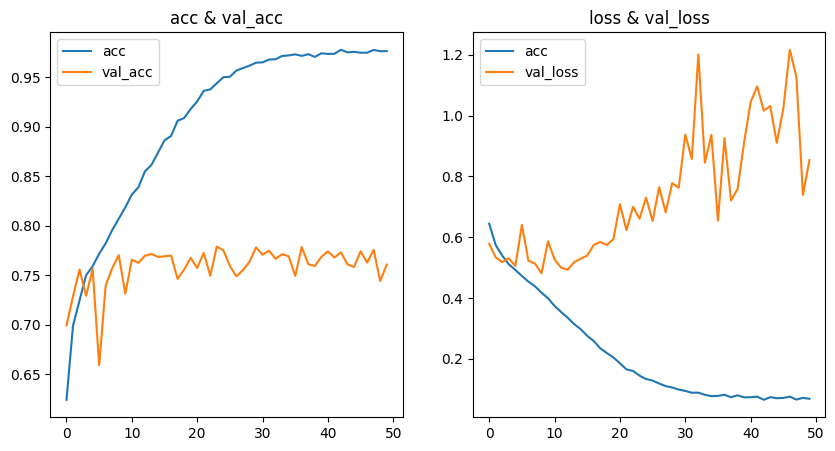

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(range(len(history.history['acc'])),history.history['acc'],label='acc')
plt.plot(range(len(history.history['val_acc'])),history.history['val_acc'],label='val_acc')
plt.title('acc & val_acc')
plt.legend()
plt.subplot(122)
plt.plot(range(len(history.history['loss'])),history.history['loss'],label='acc')
plt.plot(range(len(history.history['val_loss'])),history.history['val_loss'],label='val_loss')
plt.title('loss & val_loss')
plt.legend()
plt.show()

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [58]:
train_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)


In [64]:
train_dir='c:\\pytest_img\\cats_dogs\\train\\'
validation_dir='c:\\pytest_img\\cats_dogs\\validation\\'
test_dir='c:\\pytest_img\\cats_dogs\\test\\'


In [65]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(image_height,image_width),batch_size=100,class_mode='binary',classes=['cats','dogs'])
validation_generator=validation_datagen.flow_from_directory(validation_dir,target_size=(image_height,image_width),batch_size=100,class_mode='binary',classes=['cats','dogs'])
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(image_height,image_width),batch_size=100,class_mode='binary',classes=['cats','dogs'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


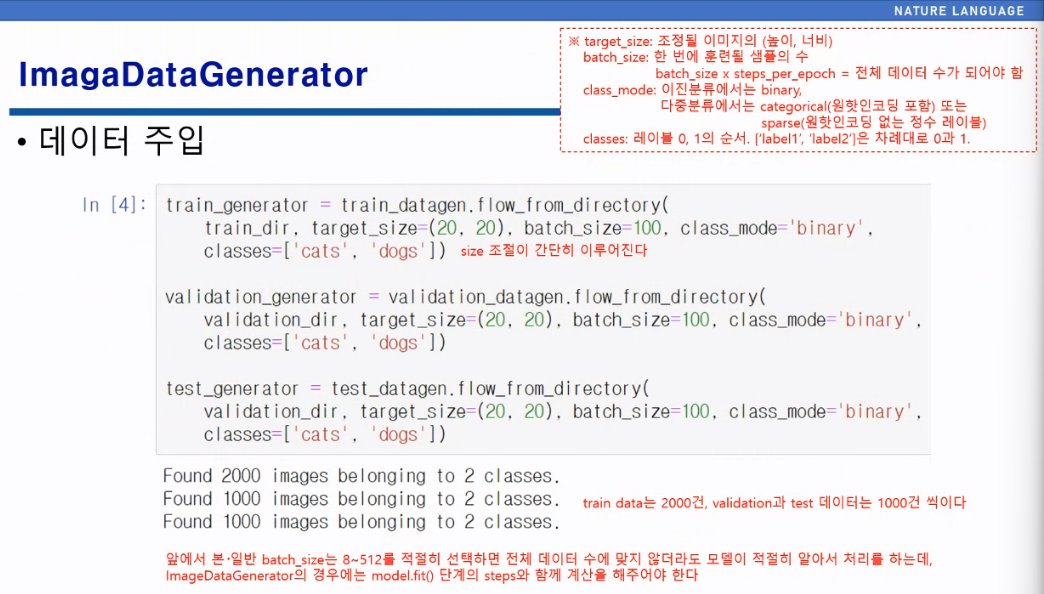

In [66]:
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np

model=models.Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3),input_shape=(image_height,image_width,channels),activation='relu'))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 18, 18, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               524416    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

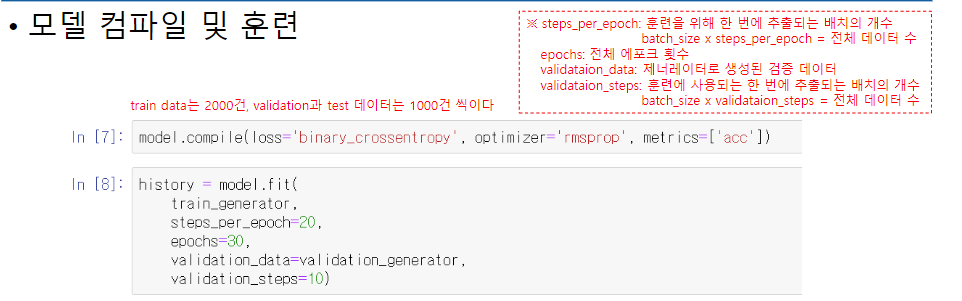

In [67]:
history2=model.fit(train_generator,steps_per_epoch=20,epochs=50,batch_size=128,validation_data=validation_generator,validation_steps=10)

Epoch 1/50
20/20 [==============================] - 13s 658ms/step - loss: 0.7329 - acc: 0.5155 - val_loss: 0.6846 - val_acc: 0.5290
Epoch 2/50
20/20 [==============================] - 3s 159ms/step - loss: 0.6806 - acc: 0.5855 - val_loss: 0.6632 - val_acc: 0.6190
Epoch 3/50
20/20 [==============================] - 3s 160ms/step - loss: 0.6625 - acc: 0.6265 - val_loss: 0.6647 - val_acc: 0.5850
Epoch 4/50
20/20 [==============================] - 3s 160ms/step - loss: 0.6371 - acc: 0.6460 - val_loss: 0.6365 - val_acc: 0.6400
Epoch 5/50
20/20 [==============================] - 4s 188ms/step - loss: 0.6026 - acc: 0.6785 - val_loss: 0.6310 - val_acc: 0.6330
Epoch 6/50
20/20 [==============================] - 3s 162ms/step - loss: 0.5843 - acc: 0.6890 - val_loss: 0.7116 - val_acc: 0.5690
Epoch 7/50
20/20 [==============================] - 3s 163ms/step - loss: 0.5604 - acc: 0.7155 - val_loss: 0.6037 - val_acc: 0.6690
Epoch 8/50
20/20 [==============================] - 3s 161ms/step - loss: 0

In [ ]:
print("test data accuracy:",model.evaluate(test_images,test_labels))

In [68]:
model.predict(test_generator)

array([[5.69436371e-01],
       [9.98855352e-01],
       [8.12206447e-01],
       [9.99697804e-01],
       [9.99992490e-01],
       [9.99986470e-01],
       [9.99493539e-01],
       [3.73482436e-01],
       [9.69771504e-01],
       [3.94450545e-01],
       [9.93729770e-01],
       [3.09756696e-01],
       [9.99859929e-01],
       [9.97979820e-01],
       [9.83795285e-01],
       [8.25960342e-06],
       [9.97817695e-01],
       [9.97767985e-01],
       [6.68212891e-01],
       [1.01089478e-03],
       [2.18659639e-04],
       [8.30491185e-01],
       [3.12444955e-01],
       [9.99906182e-01],
       [9.99910712e-01],
       [1.93294346e-01],
       [3.69045824e-06],
       [9.42348480e-01],
       [7.88327098e-01],
       [7.74877787e-01],
       [3.00024211e-01],
       [9.99987125e-01],
       [9.99865174e-01],
       [7.07008839e-01],
       [9.94006395e-01],
       [1.80929899e-04],
       [1.84243470e-01],
       [9.98539686e-01],
       [1.88326836e-03],
       [9.99514282e-01],


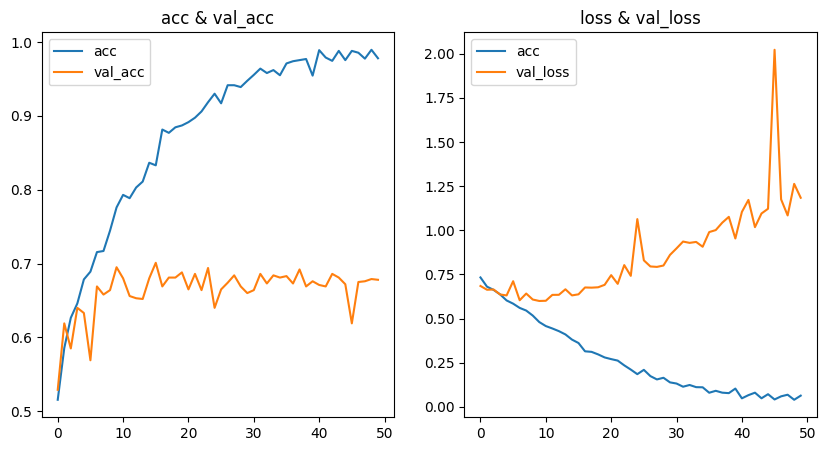

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(range(len(history2.history['acc'])),history2.history['acc'],label='acc')
plt.plot(range(len(history2.history['val_acc'])),history2.history['val_acc'],label='val_acc')
plt.title('acc & val_acc')
plt.legend()
plt.subplot(122)
plt.plot(range(len(history2.history['loss'])),history2.history['loss'],label='acc')
plt.plot(range(len(history2.history['val_loss'])),history2.history['val_loss'],label='val_loss')
plt.title('loss & val_loss')
plt.legend()
plt.show()

In [70]:
history2=model.fit(train_generator,epochs=10,batch_size=128,validation_data=validation_generator)

Epoch 1/10
20/20 [==============================] - 3s 160ms/step - loss: 0.0259 - acc: 0.9940 - val_loss: 1.4367 - val_acc: 0.6670
Epoch 2/10
20/20 [==============================] - 3s 150ms/step - loss: 0.0470 - acc: 0.9855 - val_loss: 1.2448 - val_acc: 0.6810
Epoch 3/10
20/20 [==============================] - 3s 149ms/step - loss: 0.0325 - acc: 0.9920 - val_loss: 1.4088 - val_acc: 0.6630
Epoch 4/10
20/20 [==============================] - 3s 149ms/step - loss: 0.0359 - acc: 0.9890 - val_loss: 1.3137 - val_acc: 0.6790
Epoch 5/10
20/20 [==============================] - 3s 148ms/step - loss: 0.0447 - acc: 0.9855 - val_loss: 1.2394 - val_acc: 0.6730
Epoch 6/10
20/20 [==============================] - 3s 151ms/step - loss: 0.0349 - acc: 0.9885 - val_loss: 1.3539 - val_acc: 0.6860
Epoch 7/10
20/20 [==============================] - 3s 151ms/step - loss: 0.0633 - acc: 0.9790 - val_loss: 1.2213 - val_acc: 0.6420
Epoch 8/10
20/20 [==============================] - 3s 150ms/step - loss: 0.

In [6]:
datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [7]:
from tensorflow.keras.preprocessing import image
img=image.load_img('c:\\pytest_img\\cats_dogs\\train\\cats\\'+'cat.2.jpg',target_size=(120,120))
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)
print(x.shape)

(1, 120, 120, 3)


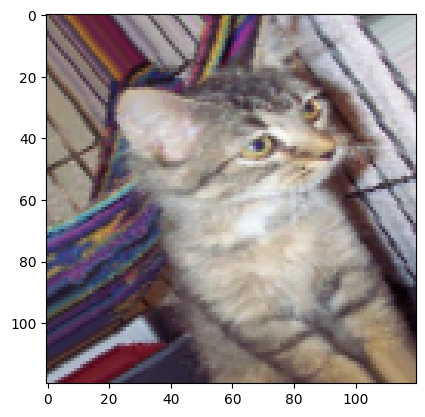

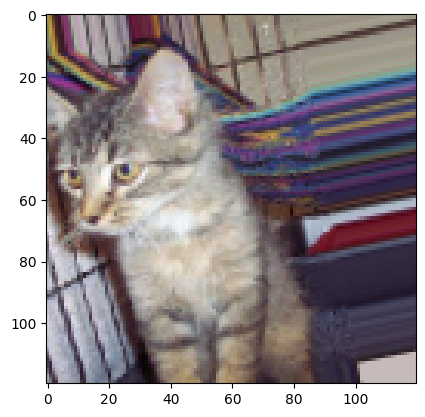

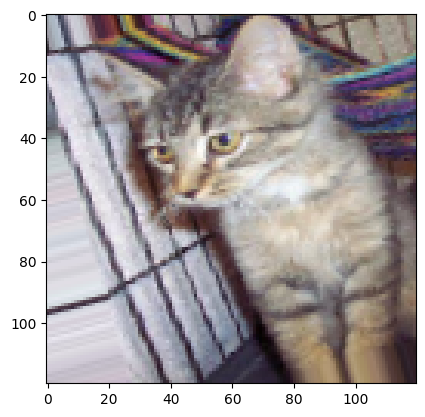

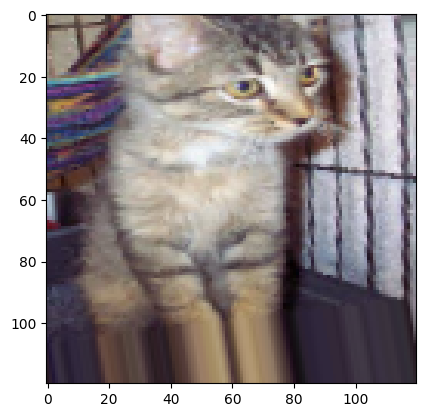

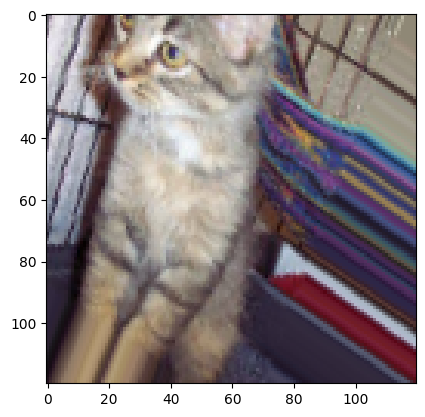

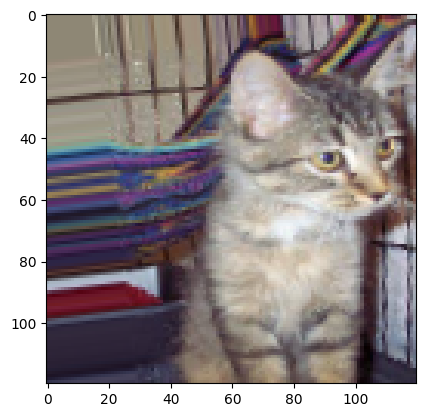

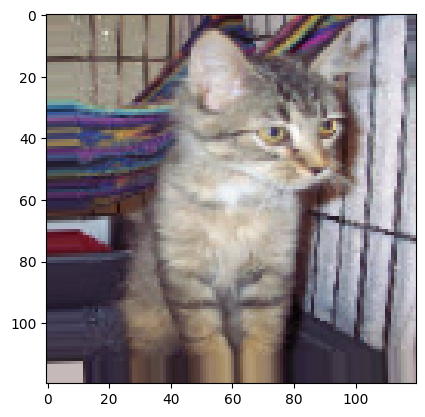

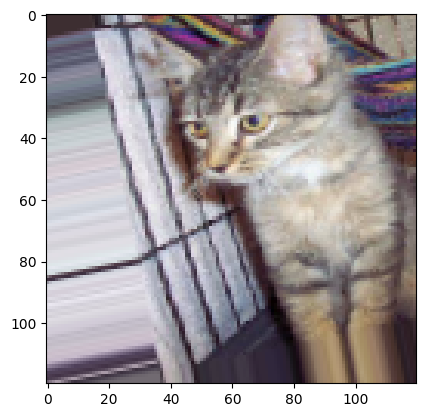

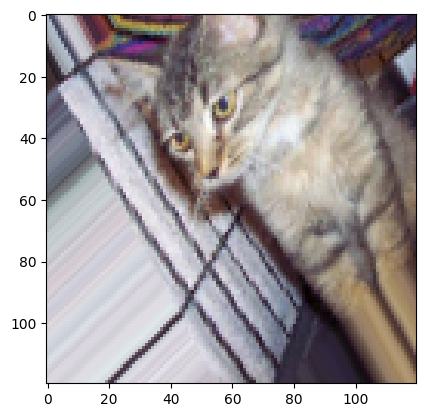

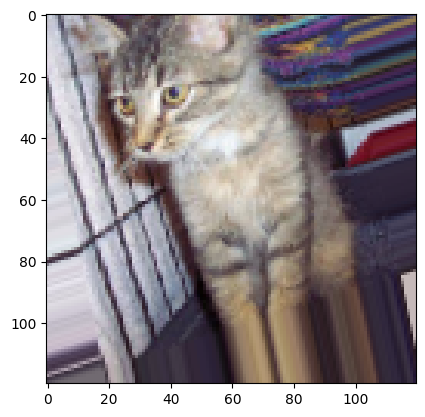

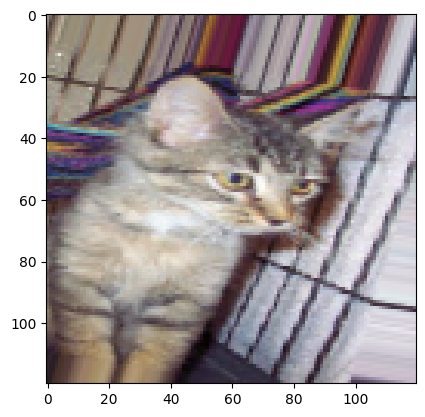

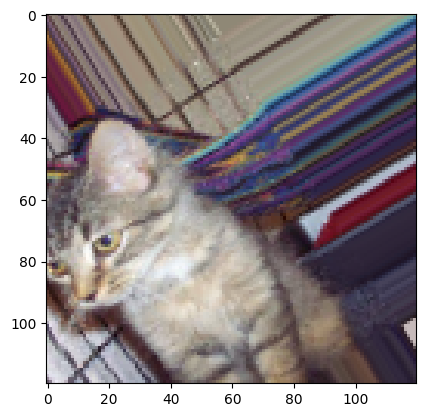

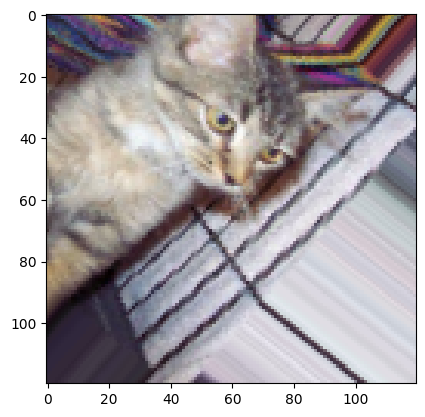

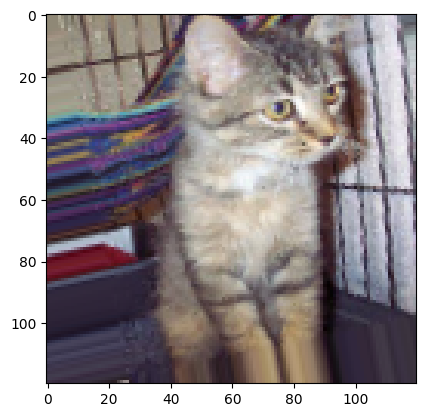

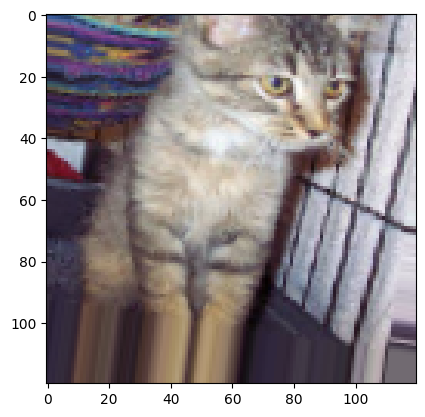

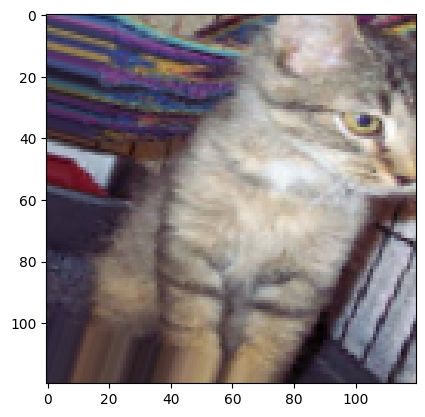

In [9]:
import matplotlib.pyplot as plt
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%16==0:
        break
plt.show()

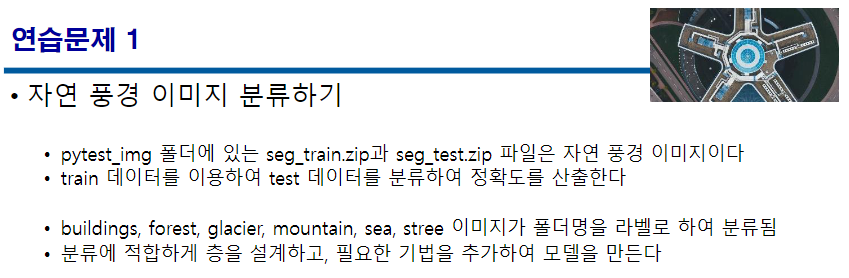

In [10]:
path_train="c:\\pytest_img\\seg_train\\"
path_test="c:\\pytest_img\\seg_test\\"